In [1]:
#!unzip "UCI HAR Dataset.zip"

In [2]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [3]:

features = list()
with open("C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo/Machine Learning 2024/Mini Project 3/Data/UCI HAR Dataset/UCI HAR Dataset/features.txt") as f:
    for line in f:
        features.append(line.split()[1])


In [4]:
features[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

In [5]:
# Read the main dataset into train_df
train_df = pd.read_csv("C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo/Machine Learning 2024/Mini Project 3/Data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)

# Generate feature names with the format "feature_1", "feature_2", ..., "feature_561"
features = [f"feature_{i}" for i in range(1, 562)]  # 561 features + 1 for indexing

# Assign the column names to train_df
train_df.columns = features


# Read and assign 'Subject' column from the subject_train.txt file
train_df['Subject'] = pd.read_csv("C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo/Machine Learning 2024/Mini Project 3/Data/UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt", header=None).iloc[:, 0]

# Read and assign 'activity' column from the y_train.txt file
train_df["activity"] = pd.read_csv("C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo/Machine Learning 2024/Mini Project 3/Data/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", header=None).iloc[:, 0]


In [6]:
activity_mapping = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6:"LAYING"}

train_df['activity_label'] = train_df['activity'].map(activity_mapping)

train_df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,Subject,activity,activity_label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,2,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,2,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,2,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,2,WALKING_UPSTAIRS


In [7]:
import pandas as pd

# Read the test dataset into test_df
test_df = pd.read_csv("C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo/Machine Learning 2024/Mini Project 3/Data/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)

# Assuming 'features' is a list containing column names
# You need to define 'features' with the same 561 elements as before

# Assign the same column names to test_df as used for the training dataset
test_df.columns = features

# Read and assign 'Subject' column from the subject_test.txt file
test_df['Subject'] = pd.read_csv("C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo/Machine Learning 2024/Mini Project 3/Data/UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt", header=None).iloc[:, 0]

# Read and assign 'activity' column from the y_test.txt file
test_df["activity"] = pd.read_csv("C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo/Machine Learning 2024/Mini Project 3/Data/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", header=None).iloc[:, 0]


In [8]:
activity_mapping = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6:"LAYING"}

test_df['activity_label'] = test_df['activity'].map(activity_mapping)
test_df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,Subject,activity,activity_label
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,2,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,2,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,2,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,2,WALKING_UPSTAIRS


In [9]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
X_test = test_df.drop(['Subject', 'activity', 'activity_label'], axis=1)
X_train = train_df.drop(['Subject', 'activity', 'activity_label'], axis=1)
y_train = train_df['activity'].values
y_test = test_df['activity'].values

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


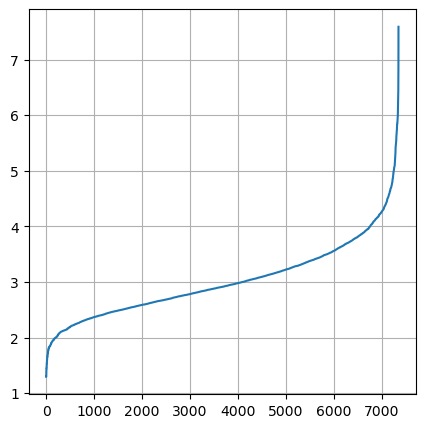

In [11]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

nearest_neighbors = NearestNeighbors(n_neighbors=2)
neighbors = nearest_neighbors.fit(X_train, y_train)
distances, indices = neighbors.kneighbors(X_train)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(5, 5))
plt.grid(True)
plt.plot(distances)


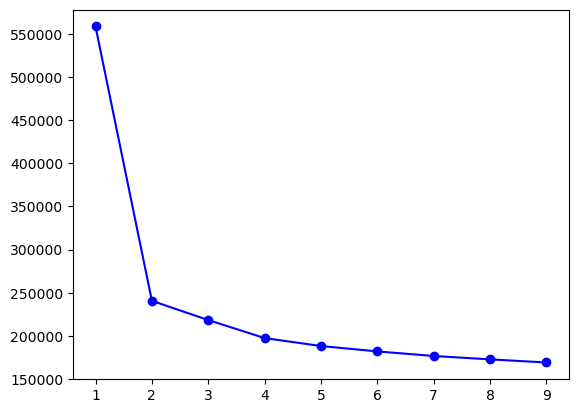

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.concat([X_train, X_test])

num_clusters = range(1, 10)

wcss = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


plt.plot(num_clusters, wcss, 'bo-')
plt.show()


In [13]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=4.5,min_samples=1200)
dbscan.fit(X_train,y_train)

DBSCAN(eps=4.5, min_samples=1200)

In [14]:
X_KMEANS = np.vstack([X_train, X_test])

In [15]:
kmeans = KMeans(n_clusters=6, n_init=100, random_state=12)
kmeans.fit(X_KMEANS)
cluster_labels = kmeans.labels_

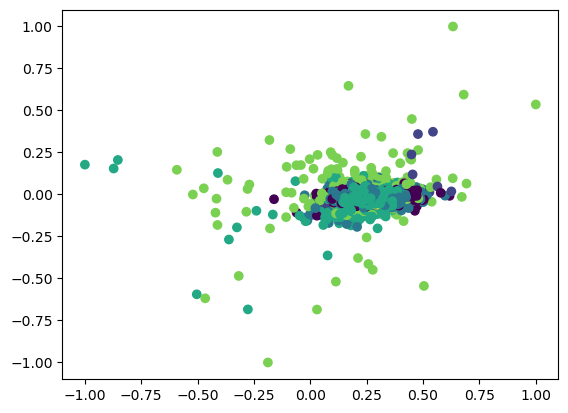

In [16]:
plt.scatter(X_KMEANS[:, 0], X_KMEANS[:, 1], c=cluster_labels)

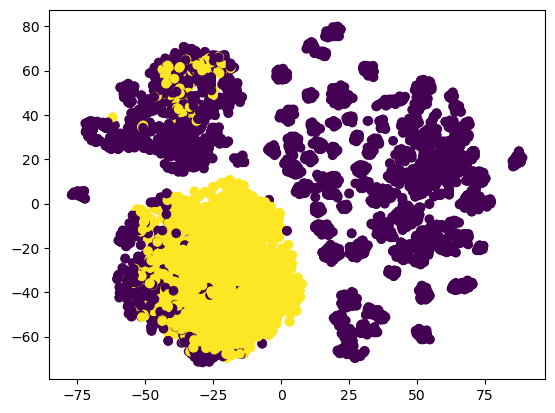

In [17]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne = model.fit_transform(X_train)
plt.scatter(tsne[:, 0], tsne[:, 1], c=dbscan.labels_)
plt.show()

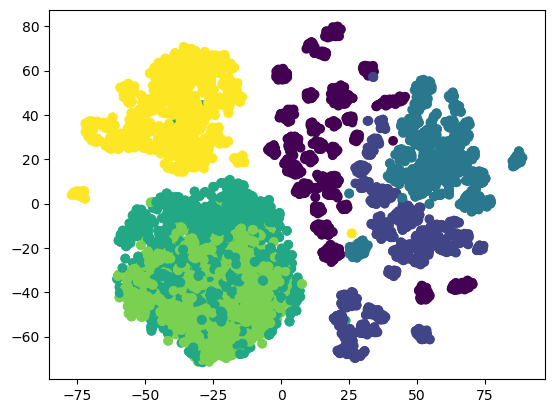

In [18]:
plt.scatter(tsne[:, 0], tsne[:, 1], c=y_train)
plt.show()

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PCAComponents = pca.fit_transform(X_train)
PCA_df = pd.DataFrame(data = PCAComponents, columns = ['pc1', 'pc2'])
PCA_df.head()

,pc1,pc2
0,-5.520280,-0.290278
1,-5.535350,-0.082530
2,-5.474988,0.287387
3,-5.677232,0.897031
4,-5.748749,1.162952


In [20]:
ydf = pd.DataFrame(y_train, columns=['Activity'])
df = pd.concat([PCA_df, ydf], axis = 1)
df

,pc1,pc2,Activity
0,-5.520280,-0.290278,5
1,-5.535350,-0.082530,5
2,-5.474988,0.287387,5
3,-5.677232,0.897031,5
4,-5.748749,1.162952,5
...,...,...,...
7347,6.253517,-2.636768,2
7348,5.782321,-2.437814,2
7349,5.857505,-3.081844,2
7350,5.421095,-3.426430,2


In [21]:
activity_mapping = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6:"LAYING"}
df['activity_label'] = df['Activity'].map(activity_mapping)
df.head(1000)

,pc1,pc2,Activity,activity_label
0,-5.520280,-0.290278,5,STANDING
1,-5.535350,-0.082530,5,STANDING
2,-5.474988,0.287387,5,STANDING
3,-5.677232,0.897031,5,STANDING
4,-5.748749,1.162952,5,STANDING
...,...,...,...,...
995,-5.046749,-0.170236,5,STANDING
996,-4.826513,-0.606786,5,STANDING
997,-4.913363,-0.466132,5,STANDING
998,-5.211512,-0.423915,5,STANDING


<Axes: xlabel='pc1', ylabel='pc2'>

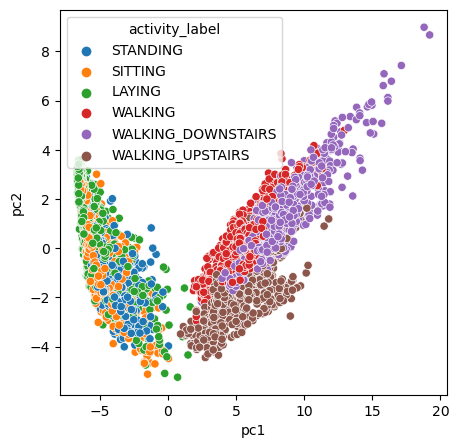

In [22]:
fig = plt.figure(figsize=(5, 5))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df.iloc[:,3])

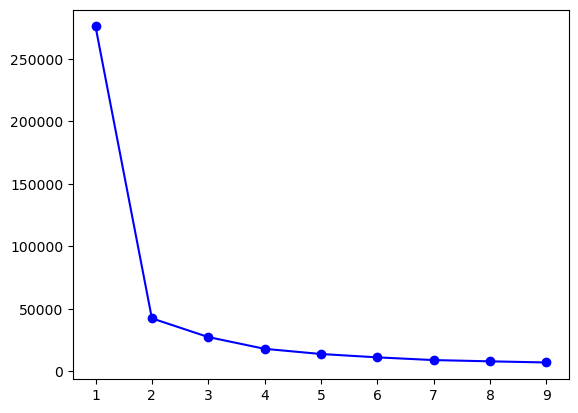

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = PCA_df

num_clusters = range(1, 10)

wcss = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(num_clusters, wcss, 'bo-')
plt.show()


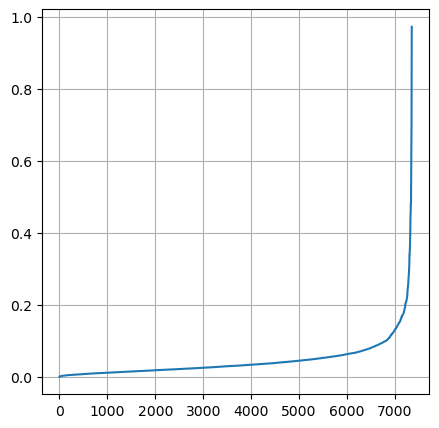

In [24]:
nearest_neighbors = NearestNeighbors(n_neighbors=2)
neighbors = nearest_neighbors.fit(PCA_df,y_train)
distances, indices = neighbors.kneighbors(PCA_df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(5, 5))
plt.grid(True)
plt.plot(distances)


In [25]:
from sklearn.cluster import DBSCAN
dbscan_withPCA=DBSCAN(eps=0.25,min_samples=50)
dbscan_withPCA.fit(PCA_df)

DBSCAN(eps=0.25, min_samples=50)

<Axes: xlabel='pc1', ylabel='pc2'>

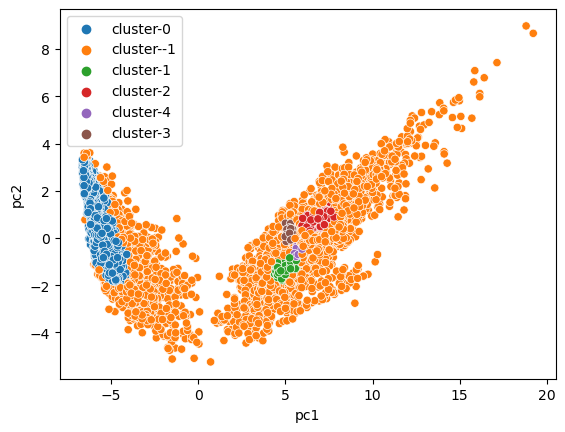

In [26]:
labels=dbscan_withPCA.labels_
sns.scatterplot(x=PCA_df.iloc[:,0], y=PCA_df.iloc[:,1], hue=["cluster-{}".format(x) for x in labels])

In [27]:
kmeans = KMeans(n_clusters=6, n_init=100, random_state=12)
kmeans.fit(PCA_df)
cluster_labels = kmeans.labels_

In [28]:
PCA_df

,pc1,pc2
0,-5.520280,-0.290278
1,-5.535350,-0.082530
2,-5.474988,0.287387
3,-5.677232,0.897031
4,-5.748749,1.162952
...,...,...
7347,6.253517,-2.636768
7348,5.782321,-2.437814
7349,5.857505,-3.081844
7350,5.421095,-3.426430


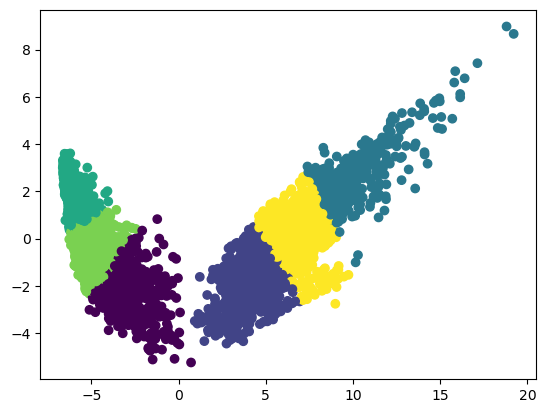

In [29]:
plt.scatter(data = PCA_df, x = "pc1", y= "pc2", c=cluster_labels)

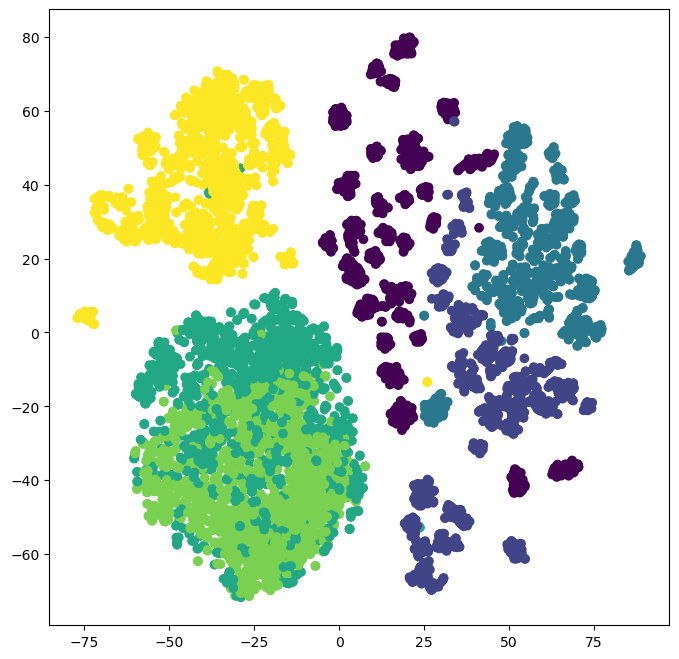

In [30]:
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne = model.fit_transform(X_train)
plt.figure(figsize=(8,8))
plt.scatter(tsne[:, 0], tsne[:, 1], c=y_train)
plt.show()

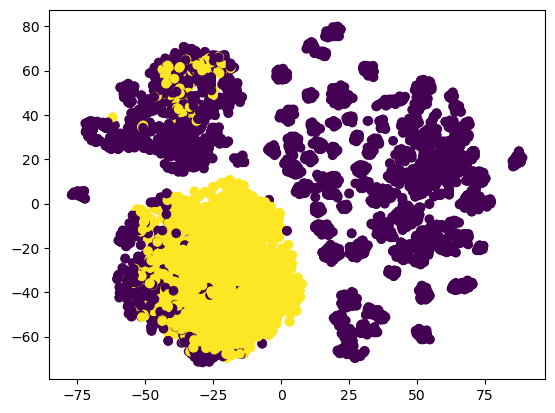

In [31]:
plt.scatter(tsne[:, 0], tsne[:, 1], c=dbscan.labels_)
plt.show()